In [1]:
#Import libraries and functions
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
import seaborn as sns
import csv
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
#Import dataset 1

train_data_1=pd.read_csv("Assig1-Dataset/train_1.csv")
val_data_1=pd.read_csv("Assig1-Dataset/val_1.csv")
test_data_1=pd.read_csv("Assig1-Dataset/test_with_label_1.csv")
info_1=pd.read_csv("Assig1-Dataset/info_1.csv")

#print (train_data_1)
#print (val_data_1)
#print (test_data_1)

#Split data and label
train_X_1=train_data_1.loc[:, :'1.827']
train_Y_1=train_data_1['1.828']

val_X_1=val_data_1.loc[:, :'1.842']
val_Y_1=val_data_1['1.843']

test_X_1=test_data_1.loc[:, :'1.849']
test_Y_1=test_data_1['4']

#print(train_Y_1)
#print(val_Y_1)
#print(test_Y_1)

In [29]:
#Import dataset 2

train_data_2=pd.read_csv("Assig1-Dataset/train_2.csv")
val_data_2=pd.read_csv("Assig1-Dataset/val_2.csv")
test_data_2=pd.read_csv("Assig1-Dataset/test_with_label_2.csv")
info_2=pd.read_csv("Assig1-Dataset/info_2.csv")

#print (train_data_2)
#print (val_data_2)
#print (test_data_2)

#Split data and label
train_X_2=train_data_2.loc[:, :'1.872']
train_Y_2=train_data_2['9']

val_X_2=val_data_2.loc[:, :'1.881']
val_Y_2=val_data_2['8']

test_X_2=test_data_2.loc[:, :'1.849']
test_Y_2=test_data_2['9']

#print(train_Y_2)
#print(val_Y_2)
#print(test_Y_2)

    index symbol
0       0      A
1       1      B
2       2      C
3       3      D
4       4      E
5       5      F
6       6      G
7       7      H
8       8      I
9       9      J
10     10      K
11     11      L
12     12      M
13     13      N
14     14      O
15     15      P
16     16      Q
17     17      R
18     18      S
19     19      T
20     20      U
21     21      V
22     22      W
23     23      X
24     24      Y
25     25      Z


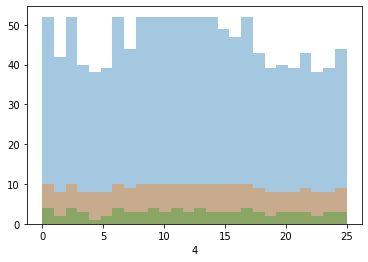

In [16]:
#Plot the distribution of datasets 1

print(info_1)
sns.distplot(train_Y_1,kde=False,bins=26)
sns.distplot(val_Y_1,kde=False,bins=26)
sns.distplot(test_Y_1,kde=False,bins=26)

   index  symbol
0      0      pi
1      1   alpha
2      2    beta
3      3   sigma
4      4   gamma
5      5   delta
6      6  lambda
7      7   omega
8      8      mu
9      9      xi


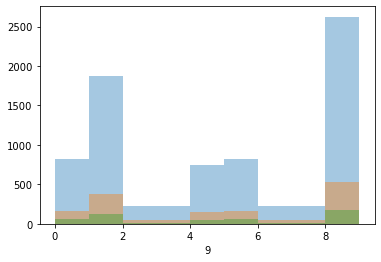

In [17]:
#Plot the distribution of datasets 1 and 2

print(info_2)
sns.distplot(train_Y_2,kde=False,bins=9)
sns.distplot(val_Y_2,kde=False,bins=9)
sns.distplot(test_Y_2,kde=False,bins=9)

In [3]:
#Gaussian Naive Bayes Classifier for dataset 1

clf = GaussianNB()
train_fit=clf.fit(train_X_1, train_Y_1)
train_score=clf.score(train_X_1, train_Y_1)

test_predict=clf.predict(test_X_1)
test_score=clf.score(test_X_1, test_Y_1)

print(train_fit,"\n", train_score,"\n",test_predict,"\n",test_score)

#Output file for Gaussian Naive Bayes Classifier for dataset 1

filename = "Output/GNB-DS1.csv"
size = np.arange(1,test_predict.shape[0])
matrix = confusion_matrix(test_Y_1, test_predict)
matrix_transpose = pd.DataFrame(matrix).transpose()
results = classification_report(test_Y_1, test_predict, output_dict=True)
results_transpose = pd.DataFrame(results).transpose()

with open(filename, "w", newline="") as file:
    writer = csv.writer(file)   
    writer.writerow(["Prediction:"])
    for i in zip(size, test_predict):
        writer.writerow([i])        
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Confusion Matrix:"])
matrix_transpose.to_csv(filename, mode="a")

with open(filename, "a", newline="") as file:
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Results:"])
results_transpose.to_csv(filename, mode="a")

GaussianNB() 
 0.9147157190635451 
 [13  7  2 18 17 25 23 22 20  6  9 11 19  1  5  1  8  2 12 16  0 25 17 16
  1 22  8 21 12  1 12 10 16 10 17 16  1 15 12 16 11 13  1 13 17 12 14 24
  0  0  3 22 20  3 14 25  9 15 14 13  2 11 12 17  6  6 20 13  3 24 22 21
  8 21 18  0 17 12 19] 
 0.6962025316455697


C:\Users\franc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
#Gaussian Naive Bayes Classifier for dataset 2

clf = GaussianNB()
train_fit=clf.fit(train_X_2, train_Y_2)
train_score=clf.score(train_X_2, train_Y_2)

test_predict=clf.predict(test_X_2)
test_score=clf.score(test_X_2, test_Y_2)

print(train_fit,"\n", train_score,"\n",test_predict,"\n",test_score)

filename = "Output/GNB-DS2.csv"
size = np.arange(1,test_predict.shape[0])
matrix = confusion_matrix(test_Y_2, test_predict)
matrix_transpose = pd.DataFrame(matrix).transpose()
results = classification_report(test_Y_2, test_predict, output_dict=True)
results_transpose = pd.DataFrame(results).transpose()

with open(filename, "w", newline="") as file:
    writer = csv.writer(file)   
    writer.writerow(["Prediction:"])
    for i in zip(size, test_predict):
        writer.writerow([i])        
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Confusion Matrix:"])
matrix_transpose.to_csv(filename, mode="a")

with open(filename, "a", newline="") as file:
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Results:"])
results_transpose.to_csv(filename, mode="a")

GaussianNB() 
 0.6396973971021926 
 [3 0 5 9 3 1 3 6 9 0 1 3 9 2 3 9 9 7 1 6 1 2 7 9 2 1 1 2 2 9 2 2 9 2 1 6 9
 1 1 3 7 4 5 9 9 1 3 6 1 0 4 5 9 0 0 8 5 6 1 1 6 3 0 6 1 1 9 0 0 3 0 1 9 5
 2 9 1 3 4 1 1 4 6 4 6 9 0 7 6 8 9 1 1 5 1 9 6 0 0 0 2 2 9 9 5 6 5 5 4 1 9
 4 5 8 5 8 0 2 9 1 9 4 9 1 1 6 9 4 9 1 1 6 1 9 1 4 6 0 2 5 3 1 9 9 4 9 9 5
 1 1 5 9 1 6 3 1 5 5 3 0 2 1 1 1 1 1 1 9 0 5 9 9 4 4 1 1 3 2 5 9 1 9 9 4 1
 9 9 4 3 1 9 1 6 5 7 9 7 6 9 6 0 9 0 5 5 2 1 5 3 4 6 3 0 9 3 2 1 0 9 2 1 6
 4 5 3 2 5 4 1 9 1 4 9 1 6 6 9 2 0 2 3 9 6 1 1 5 4 9 7 9 1 1 1 9 0 9 3 1 1
 9 0 1 1 6 6 9 2 7 1 5 4 5 1 7 1 5 2 9 5 0 3 6 6 3 9 0 1 9 1 3 9 2 8 1 9 1
 0 8 9 3 5 9 5 1 1 1 7 0 3 9 5 0 9 1 2 9 9 9 7 9 1 6 5 8 9 9 0 1 9 6 1 9 4
 1 6 7 1 9 9 2 1 6 8 3 9 5 4 2 9 3 3 3 2 1 9 9 1 1 1 3 9 4 2 9 2 3 1 1 3 9
 5 1 5 1 6 1 9 8 8 1 9 1 1 1 9 4 4 9 0 9 9 3 1 9 1 2 8 2 1 1 9 0 9 2 7 8 9
 8 4 5 6 1 0 1 1 9 1 9 5 9 6 0 9 2 0 9 5 4 2 9 3 1 9 9 1 1 6 9 5 1 0 0 1 3
 9 2 2 4 5 6 6 1 9 8 4 1 0 1 9 1 2 2 9 9 9 1 8 7 2 9 8 2 9 3 5 5

In [111]:
#Baseline Decision Tree for dataset 1

clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf.fit(iris.data, iris.target)
parameters = clf.get_params()
parameters['criterion'] = 'entropy'

entropy_clf = DecisionTreeClassifier(**parameters)
train_fit = entropy_clf.fit(train_X_1, train_Y_1)
train_score = entropy_clf.score(train_X_1, train_Y_1)

test_predict = entropy_clf.predict(test_X_1)
test_score = entropy_clf.score(test_X_1, test_Y_1)
print(train_fit,"\n", train_score,"\n",test_predict,"\n",test_score)

filename = "Output/Base-DST-DS1.csv"
size = np.arange(1,test_predict.shape[0])
matrix = confusion_matrix(test_Y_1, test_predict)
matrix_transpose = pd.DataFrame(matrix).transpose()
results = classification_report(test_Y_1, test_predict, output_dict=True)
results_transpose = pd.DataFrame(results).transpose()

with open(filename, "w", newline="") as file:
    writer = csv.writer(file)   
    writer.writerow(["Prediction:"])
    for i in zip(size, test_predict):
        writer.writerow([i])        
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Confusion Matrix:"])
matrix_transpose.to_csv(filename, mode="a")

with open(filename, "a", newline="") as file:
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Results:"])
results_transpose.to_csv(filename, mode="a")

DecisionTreeClassifier(criterion='entropy', random_state=0) 
 1.0 
 [13 22  2 18 17 11 22 13 20  6  9 11 14  4  5 18  3  2 13  4  0  9 17  9
  4 22 20 23 24  1 23  6  3 20 24 18 19  9 15 16 20 13 15 13 13 13 14 24
  0  7  3 21 20 15 14 23  9 16 14 12  2 11 10  0  0  6 20 24 21 24  0 21
  8 21 18 15  5 14 19] 
 0.5063291139240507


C:\Users\franc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
#Baseline Decision Tree for dataset 2

clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf.fit(iris.data, iris.target)
parameters = clf.get_params()
parameters['criterion'] = 'entropy'

entropy_clf = DecisionTreeClassifier(**parameters)
train_fit = entropy_clf.fit(train_X_2, train_Y_2)
train_score = entropy_clf.score(train_X_2, train_Y_2)

test_predict = entropy_clf.predict(test_X_2)
test_score = entropy_clf.score(test_X_2, test_Y_2)
print(train_fit,"\n", train_score,"\n",test_predict,"\n",test_score)

filename = "Output/Base-DST-DS2.csv"
size = np.arange(1,test_predict.shape[0])
matrix = confusion_matrix(test_Y_2, test_predict)
matrix_transpose = pd.DataFrame(matrix).transpose()
results = classification_report(test_Y_2, test_predict, output_dict=True)
results_transpose = pd.DataFrame(results).transpose()

with open(filename, "w", newline="") as file:
    writer = csv.writer(file)   
    writer.writerow(["Prediction:"])
    for i in zip(size, test_predict):
        writer.writerow([i])        
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Confusion Matrix:"])
matrix_transpose.to_csv(filename, mode="a")

with open(filename, "a", newline="") as file:
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Results:"])
results_transpose.to_csv(filename, mode="a")

DecisionTreeClassifier(criterion='entropy', random_state=0) 
 1.0 
 [4 9 5 4 1 1 3 8 9 4 1 3 9 0 1 9 9 7 1 6 1 9 7 9 8 1 1 8 8 9 8 8 9 8 1 9 9
 1 1 3 7 0 8 9 4 1 1 5 1 1 0 5 9 0 1 8 5 9 1 1 5 0 0 9 0 1 4 0 4 1 1 1 5 5
 8 4 1 9 9 7 3 1 5 0 6 9 9 7 6 8 4 1 1 9 1 9 9 0 0 5 8 8 2 9 5 8 5 9 4 1 9
 4 5 8 9 8 1 8 9 1 5 5 9 1 1 2 9 9 9 1 1 8 1 9 1 4 9 4 8 5 0 1 5 4 4 9 9 9
 1 1 5 9 1 5 0 1 5 5 5 0 8 0 1 1 1 1 3 9 0 5 9 5 0 9 1 1 4 8 5 4 1 9 9 0 1
 9 9 9 3 1 9 1 2 4 7 9 1 9 9 9 0 9 0 9 8 8 5 5 4 4 9 0 0 9 0 8 1 1 9 8 1 9
 5 9 3 0 5 4 1 9 1 9 9 1 2 5 9 2 1 0 0 9 9 1 1 5 0 9 8 9 1 1 1 5 0 9 5 1 1
 4 1 1 1 4 2 9 2 7 4 5 4 9 1 7 0 5 0 9 9 0 1 4 6 3 9 0 1 5 1 1 9 8 8 1 9 1
 0 8 9 0 5 9 5 1 1 1 7 8 1 4 9 1 4 1 8 5 9 9 7 9 6 9 9 4 9 9 0 1 5 5 1 4 4
 1 5 7 1 9 4 8 7 5 8 0 4 5 9 9 5 3 1 1 8 1 9 9 1 5 3 3 2 2 5 9 9 0 1 1 3 9
 4 1 5 1 9 1 9 8 9 1 9 1 1 1 9 4 4 9 9 5 9 0 1 9 1 2 8 5 1 1 9 4 9 8 7 8 9
 8 2 5 6 1 0 1 1 9 1 4 9 4 9 4 9 8 0 9 5 1 8 5 9 1 9 9 1 1 9 5 5 1 0 0 1 0
 5 8 8 0 9 9 9 1 9 8 4 1 0 1 9 1

In [121]:
#Best Decision tree for dataset 1

dt = DecisionTreeClassifier(random_state=0)

parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [1],
              'min_samples_split': [0, 1, 5, 10],
              'min_impurity_decrease': [0, 1, 5, 10],
              'class_weight': ['none', 'balanced']}

clf = GridSearchCV(dt, parameters, n_jobs = -1, cv = 3)
train_fit=clf.fit(train_X_1, train_Y_1)
train_score=clf.score(train_X_1, train_Y_1)

test_predict = clf.predict(test_X_1)
test_score=clf.score(test_X_1, test_Y_1)

print(train_fit,"\n", train_score,"\n",test_predict,"\n",test_score)

print('Best parameters found:\n', clf.best_params_)

filename = "Output/Best-DST-DS1.csv"
size = np.arange(1,test_predict.shape[0])
matrix = confusion_matrix(test_Y_1, test_predict)
matrix_transpose = pd.DataFrame(matrix).transpose()
results = classification_report(test_Y_1, test_predict, output_dict=True)
results_transpose = pd.DataFrame(results).transpose()

with open(filename, "w", newline="") as file:
    writer = csv.writer(file)   
    writer.writerow(["Prediction:"])
    for i in zip(size, test_predict):
        writer.writerow([i])        
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Confusion Matrix:"])
matrix_transpose.to_csv(filename, mode="a")

with open(filename, "a", newline="") as file:
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Results:"])
results_transpose.to_csv(filename, mode="a")

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'class_weight': ['none', 'balanced'],
                         'criterion': ['gini', 'entropy'], 'max_depth': [1],
                         'min_impurity_decrease': [0, 1, 5, 10],
                         'min_samples_split': [0, 1, 5, 10]}) 
 0.07525083612040134 
 [ 7  7 15  7 15  7  7  7  7  7 15  7  7 15 15 15 15  7  7 15 15 15 15 15
 15  7  7  7  7 15  7  7 15  7  7  7 15 15 15  7  7  7 15  7  7  7  7  7
 15  7 15  7  7 15 15  7 15 15  7  7 15  7  7 15  7 15  7  7  7  7  7  7
 15  7  7 15 15 15 15] 
 0.0759493670886076
Best parameters found:
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'min_impurity_decrease': 0, 'min_samples_split': 5}


C:\Users\franc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
#Best Decision tree for dataset 2

dt = DecisionTreeClassifier(random_state=0)

parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [1],
              'min_samples_split': [0, 1, 2, 5],
              'min_impurity_decrease': [0, 1, 2, 5],
              'class_weight': ['none', 'balanced']}

clf = GridSearchCV(dt, parameters, n_jobs = -1, cv = 3)
train_fit=clf.fit(train_X_2, train_Y_2)
train_score=clf.score(train_X_2, train_Y_2)

test_predict = clf.predict(test_X_2)
test_score=clf.score(test_X_2, test_Y_2)

print(train_fit,"\n", train_score,"\n",test_predict,"\n",test_score)

print('Best parameters found:\n', clf.best_params_)

filename = "Output/Best-DST-DS2.csv"
size = np.arange(1,test_predict.shape[0])
matrix = confusion_matrix(test_Y_2, test_predict)
matrix_transpose = pd.DataFrame(matrix).transpose()
results = classification_report(test_Y_2, test_predict, output_dict=True)
results_transpose = pd.DataFrame(results).transpose()

with open(filename, "w", newline="") as file:
    writer = csv.writer(file)   
    writer.writerow(["Prediction:"])
    for i in zip(size, test_predict):
        writer.writerow([i])        
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Confusion Matrix:"])
matrix_transpose.to_csv(filename, mode="a")

with open(filename, "a", newline="") as file:
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Results:"])
results_transpose.to_csv(filename, mode="a")

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'class_weight': ['none', 'balanced'],
                         'criterion': ['gini', 'entropy'], 'max_depth': [1],
                         'min_impurity_decrease': [0, 1, 2, 5],
                         'min_samples_split': [0, 1, 2, 5]}) 
 0.2402872163097833 
 [9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9

C:\Users\franc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
#Perceptron for dataset 1

clf = Perceptron(tol=1e-3, random_state=0)
train_fit=clf.fit(train_X_1, train_Y_1)
train_score=clf.score(train_X_1, train_Y_1)

test_predict=clf.predict(test_X_1)
test_score=clf.score(test_X_1, test_Y_1)

print(train_fit,"\n", train_score,"\n",test_predict,"\n",test_score)

filename = "Output/PER-DS1.csv"
size = np.arange(1,test_predict.shape[0])
matrix = confusion_matrix(test_Y_1, test_predict)
matrix_transpose = pd.DataFrame(matrix).transpose()
results = classification_report(test_Y_1, test_predict, output_dict=True)
results_transpose = pd.DataFrame(results).transpose()

with open(filename, "w", newline="") as file:
    writer = csv.writer(file)   
    writer.writerow(["Prediction:"])
    for i in zip(size, test_predict):
        writer.writerow([i])        
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Confusion Matrix:"])
matrix_transpose.to_csv(filename, mode="a")

with open(filename, "a", newline="") as file:
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Results:"])
results_transpose.to_csv(filename, mode="a")

Perceptron() 
 0.9941471571906354 
 [13 22  2 18 17 18 23 22 20  2  9 11 24  4  5  6  8  2 12 16  0 25 17  9
  1 21  8 23  8  3 23 10 16 10 23  6 19 15  3 16 11 13  1 13  7 10 14 24
  0  7  3 22 20  3 14 25  9 17 14  7  2 11  7 22  6  6 20 12  1 24 22 21
  8 22 18 15 17  6 19] 
 0.7721518987341772


In [124]:
#Perceptron for dataset 2

clf = Perceptron(tol=1e-3, random_state=0)
train_fit=clf.fit(train_X_2, train_Y_2)
train_score=clf.score(train_X_2, train_Y_2)

test_predict=clf.predict(test_X_2)
test_score=clf.score(test_X_2, test_Y_2)

print(train_fit,"\n", train_score,"\n",test_predict,"\n",test_score)

filename = "Output/PER-DS2.csv"
size = np.arange(1,test_predict.shape[0])
matrix = confusion_matrix(test_Y_2, test_predict)
matrix_transpose = pd.DataFrame(matrix).transpose()
results = classification_report(test_Y_2, test_predict, output_dict=True)
results_transpose = pd.DataFrame(results).transpose()

with open(filename, "w", newline="") as file:
    writer = csv.writer(file)   
    writer.writerow(["Prediction:"])
    for i in zip(size, test_predict):
        writer.writerow([i])        
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Confusion Matrix:"])
matrix_transpose.to_csv(filename, mode="a")

with open(filename, "a", newline="") as file:
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Results:"])
results_transpose.to_csv(filename, mode="a")

Perceptron() 
 0.842287472752917 
 [0 4 5 4 1 1 3 8 4 5 1 3 9 2 3 9 9 7 1 1 1 5 7 9 1 1 1 1 8 9 8 8 9 8 1 5 9
 1 1 1 7 4 5 9 9 1 1 5 1 5 4 5 9 0 0 8 5 4 1 1 9 0 0 9 4 1 4 0 1 3 1 1 5 5
 8 5 1 4 4 5 1 0 5 0 6 5 9 7 1 8 5 1 1 5 1 5 9 0 0 4 8 8 2 4 5 8 5 5 4 1 9
 5 5 4 5 8 1 8 9 1 5 5 9 1 1 5 4 4 4 1 1 8 1 9 1 4 5 0 8 5 0 1 4 5 4 4 4 5
 1 1 5 9 1 5 4 1 5 5 4 0 8 0 1 1 1 1 1 9 0 5 9 5 0 4 1 1 4 4 5 4 1 5 9 4 1
 9 4 1 3 1 4 1 8 5 7 9 7 9 8 5 0 9 0 5 1 8 1 5 1 4 5 1 0 9 3 8 1 1 9 4 1 4
 4 5 1 8 5 8 1 9 1 1 9 1 1 5 9 1 1 2 0 5 9 1 1 5 4 5 7 9 1 1 1 4 0 9 5 1 1
 4 1 1 1 5 5 5 2 7 8 5 4 4 1 7 0 5 8 9 5 0 4 4 6 3 9 0 1 5 1 3 9 4 8 1 9 1
 0 0 5 1 5 9 5 1 1 1 7 1 3 9 9 1 4 1 8 5 5 9 7 9 1 9 5 5 5 9 0 1 5 5 1 9 4
 1 1 7 1 9 5 8 5 5 8 0 5 5 4 4 5 3 3 1 8 1 9 5 1 1 1 4 1 4 2 4 2 8 1 1 1 9
 5 1 5 1 4 1 9 8 8 1 9 1 1 1 5 4 4 5 1 9 9 0 1 5 1 2 8 2 1 1 9 0 9 8 7 8 9
 5 4 5 6 1 1 1 1 9 1 4 5 4 9 1 9 8 0 9 5 4 8 0 0 1 9 9 1 1 5 9 5 1 0 0 1 0
 4 8 4 4 5 9 4 1 2 8 0 1 0 1 9 1 8 8 9 8 4 1 8 7 8 9 8 2 9 5 5 5 

In [125]:
#Baseline Multi-Layered Perceptron for dataset 1

clf = MLPClassifier(solver = 'sgd', activation = 'logistic', hidden_layer_sizes = (100, ))
train_fit=clf.fit(train_X_1, train_Y_1)
train_score=clf.score(train_X_1, train_Y_1)

test_predict=clf.predict(test_X_1)
test_score=clf.score(test_X_1, test_Y_1)

print(train_fit,"\n", train_score,"\n",test_predict,"\n",test_score)

filename = "Output/Base-MLP-DS1.csv"
size = np.arange(1,test_predict.shape[0])
matrix = confusion_matrix(test_Y_1, test_predict)
matrix_transpose = pd.DataFrame(matrix).transpose()
results = classification_report(test_Y_1, test_predict, output_dict=True)
results_transpose = pd.DataFrame(results).transpose()

with open(filename, "w", newline="") as file:
    writer = csv.writer(file)   
    writer.writerow(["Prediction:"])
    for i in zip(size, test_predict):
        writer.writerow([i])        
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Confusion Matrix:"])
matrix_transpose.to_csv(filename, mode="a")

with open(filename, "a", newline="") as file:
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Results:"])
results_transpose.to_csv(filename, mode="a")

MLPClassifier(activation='logistic', solver='sgd') 
 0.48244147157190637 
 [13  0  2  8 17 11 17 22 11  2  9 11  8 11 10  0  8  2 12 14  0  9 17  8
 17 10  8 17  6 14 13 10 14 10 17  2  8 15 12 12 10 13 15  0 17 12 14 12
  0  7  8 11 11 14 14  0  9 17 14 12 11 11 10 17  6  6 14 12 13 13 22 13
  8 12  2 10 17  6  8] 
 0.3924050632911392


C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
#Baseline Multi-Layered Perceptron for dataset 2

clf = MLPClassifier(solver = 'sgd', activation = 'logistic', hidden_layer_sizes = (100, ))
train_fit=clf.fit(train_X_2, train_Y_2)
train_score=clf.score(train_X_2, train_Y_2)

test_predict=clf.predict(test_X_2)
test_score=clf.score(test_X_2, test_Y_2)

print(train_fit,"\n", train_score,"\n",test_predict,"\n",test_score)

filename = "Output/Base-MLP-DS2.csv"
size = np.arange(1,test_predict.shape[0])
matrix = confusion_matrix(test_Y_2, test_predict)
matrix_transpose = pd.DataFrame(matrix).transpose()
results = classification_report(test_Y_2, test_predict, output_dict=True)
results_transpose = pd.DataFrame(results).transpose()

with open(filename, "w", newline="") as file:
    writer = csv.writer(file)   
    writer.writerow(["Prediction:"])
    for i in zip(size, test_predict):
        writer.writerow([i])        
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Confusion Matrix:"])
matrix_transpose.to_csv(filename, mode="a")

with open(filename, "a", newline="") as file:
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Results:"])
results_transpose.to_csv(filename, mode="a")

MLPClassifier(activation='logistic', solver='sgd') 
 0.8622900371842543 
 [0 4 5 9 1 1 3 8 9 5 1 3 9 9 3 9 9 7 1 6 1 9 7 9 8 1 1 8 8 9 8 8 9 8 1 5 9
 1 1 1 7 9 5 9 9 1 1 5 1 9 4 5 9 0 0 8 5 9 1 1 9 0 0 9 0 1 4 0 0 3 0 1 9 5
 8 9 1 0 4 7 1 0 5 0 9 9 9 7 1 8 4 1 1 5 1 9 9 0 0 4 8 8 2 4 5 8 5 5 4 1 9
 5 5 8 9 8 1 8 9 1 5 5 9 1 1 2 4 4 9 1 1 8 1 9 1 4 9 0 8 5 0 1 4 4 4 9 9 5
 1 1 5 9 1 5 0 1 5 5 3 0 8 0 1 1 1 1 1 9 0 5 9 5 0 4 1 1 0 0 5 4 1 9 9 4 1
 9 4 0 3 1 9 1 9 5 7 9 7 9 9 5 0 9 0 5 5 8 1 5 1 4 5 1 0 9 0 8 1 1 9 8 1 9
 4 9 3 9 5 8 1 9 1 4 9 1 6 5 9 8 1 2 0 9 9 1 1 5 0 9 7 9 1 1 1 9 0 9 4 1 1
 9 1 1 1 5 5 9 2 7 8 5 4 9 1 7 8 5 8 9 5 0 4 4 6 0 9 0 1 9 1 3 9 8 8 1 9 1
 0 8 5 1 5 9 5 1 1 1 7 1 3 9 9 1 9 1 8 5 9 9 7 9 1 9 9 2 5 9 0 1 9 5 1 9 4
 1 6 7 1 9 4 8 9 5 8 0 5 5 4 9 9 5 3 1 8 1 9 4 1 1 1 0 9 0 9 9 2 8 1 1 1 9
 5 1 5 1 4 1 9 8 8 1 9 1 1 1 9 4 4 9 8 9 9 0 1 5 1 2 8 2 1 1 9 0 9 8 7 8 9
 8 0 5 6 1 9 1 1 9 1 4 5 9 9 0 9 8 0 9 5 4 8 9 0 1 9 9 1 1 9 9 5 1 0 0 1 0
 9 8 8 4 9 9 9 1 9 8 0 1 0

C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [127]:
#Best Multi-Layered Perceptron for dataset 1

mlp = MLPClassifier(max_iter=200)

parameters = {'activation': ['logistic', 'tanh', 'relu', 'identity'],
              'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
              'solver': ['adam', 'sgd']}

clf = GridSearchCV(mlp, parameters, n_jobs = -1, cv = 3)
train_fit=clf.fit(train_X_1, train_Y_1)
train_score=clf.score(train_X_1, train_Y_1)

test_predict = clf.predict(test_X_1)
test_score=clf.score(test_X_1, test_Y_1)

print(train_fit,"\n", train_score,"\n",test_predict,"\n",test_score)

print('Best parameters found:\n', clf.best_params_)

filename = "Output/Best-MLP-DS1.csv"
size = np.arange(1,test_predict.shape[0])
matrix = confusion_matrix(test_Y_1, test_predict)
matrix_transpose = pd.DataFrame(matrix).transpose()
results = classification_report(test_Y_1, test_predict, output_dict=True)
results_transpose = pd.DataFrame(results).transpose()

with open(filename, "w", newline="") as file:
    writer = csv.writer(file)   
    writer.writerow(["Prediction:"])
    for i in zip(size, test_predict):
        writer.writerow([i])        
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Confusion Matrix:"])
matrix_transpose.to_csv(filename, mode="a")

with open(filename, "a", newline="") as file:
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Results:"])
results_transpose.to_csv(filename, mode="a")

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu', 'identity'],
                         'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
                         'solver': ['adam', 'sgd']}) 
 1.0 
 [13  7  2 18 17 18 23 22 20 11  9 11 19  4  5  6  8  2  4 16  0 25 17  9
  1 21  8 24  6  3 23 10 16 10  0  6 19 15 15 16 11 13  1 13  7 10 14 24
  0  7  3 21 20  3 14  0  9 15 14  7  2 11  7  0  6  6 20 12  1 24 22 21
  8 21 18 17 17  6 19] 
 0.7974683544303798
Best parameters found:
 {'activation': 'identity', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


In [128]:
#Best Multi-Layered Perceptron for dataset 2

mlp = MLPClassifier(max_iter=200)

parameters = {'activation': ['logistic', 'tanh', 'relu', 'identity'],
              'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
              'solver': ['adam', 'sgd']}

clf = GridSearchCV(mlp, parameters, n_jobs = -1, cv = 3)
train_fit=clf.fit(train_X_2, train_Y_2)
train_score=clf.score(train_X_2, train_Y_2)

test_predict = clf.predict(test_X_2)
test_score=clf.score(test_X_2, test_Y_2)

print(train_fit,"\n", train_score,"\n",test_predict,"\n",test_score)

print('Best parameters found:\n', clf.best_params_)

filename = "Output/Best-MLP-DS2.csv"
size = np.arange(1,test_predict.shape[0])
matrix = confusion_matrix(test_Y_2, test_predict)
matrix_transpose = pd.DataFrame(matrix).transpose()
results = classification_report(test_Y_2, test_predict, output_dict=True)
results_transpose = pd.DataFrame(results).transpose()

with open(filename, "w", newline="") as file:
    writer = csv.writer(file)   
    writer.writerow(["Prediction:"])
    for i in zip(size, test_predict):
        writer.writerow([i])        
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Confusion Matrix:"])
matrix_transpose.to_csv(filename, mode="a")

with open(filename, "a", newline="") as file:
    writer = csv.writer(file)
    writer.writerow("")
    writer.writerow(["Results:"])
results_transpose.to_csv(filename, mode="a")

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu', 'identity'],
                         'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
                         'solver': ['adam', 'sgd']}) 
 0.9643544044108219 
 [0 4 5 4 1 1 3 8 9 0 1 3 9 9 3 9 9 7 1 6 1 9 7 9 8 1 1 8 8 9 8 8 9 8 1 5 9
 1 1 1 7 0 5 9 9 1 1 5 1 8 2 5 9 0 0 8 5 5 1 1 9 0 0 9 0 1 4 0 2 3 1 1 5 5
 8 4 1 4 9 7 1 0 5 0 6 9 9 7 1 8 4 1 1 5 1 9 9 0 0 4 8 8 2 4 5 8 5 5 4 1 9
 5 5 8 9 8 1 8 9 1 5 5 9 1 1 2 4 4 4 1 1 8 1 9 1 4 2 0 8 5 0 1 4 5 4 9 9 9
 1 1 5 9 1 5 0 1 5 5 3 0 8 0 1 1 1 1 1 9 0 5 9 5 0 4 1 1 0 0 5 4 1 5 9 4 1
 9 4 8 3 1 9 1 8 5 7 9 7 9 9 9 0 9 0 9 1 8 1 5 1 4 5 0 0 9 0 8 1 1 9 8 1 4
 4 4 3 8 5 4 1 9 1 9 9 1 2 5 9 2 1 2 0 9 9 1 1 5 0 5 7 9 1 1 1 9 0 9 5 1 1
 4 1 1 1 5 5 9 2 7 8 5 4 4 1 7 0 5 8 9 5 0 0 4 6 3 9 0 1 5 1 3 9 4 8 1 9 1
 0 0 5 3 5 9 5 1 1 1 7 8 1 9 9 1 4 1 8 5 9 9 7 9 1 9 9 4 5 9 0 1 9 5 1 9 4
 1 1 7 1 9 4 8 8 5 8 0 5 5 9 2 9 5 3 8